In [2]:
import numpy as np
import pygimli as pg
import pybert as pb
from pygimli.physics import ert
from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle


In [3]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/'

In [4]:
data = ert.load(dir+"res2dinv_inputs/amphibious_ERT_western_transect2_gps.Dat")
#data = ert.load(dir+"res2dinv_inputs/ERT_western_perpendicular_gps.Dat")

data


16/05/24 - 16:06:20 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


Data: Sensors: 61 data: 835, nonzero entries: ['a', 'b', 'm', 'n', 'rhoa', 'valid']

16/05/24 - 16:06:27 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pg\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (15.9s x 2): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\16948805757729193074
16/05/24 - 16:06:27 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pg\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 2): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\9691116669278313229


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1f85d344310>)

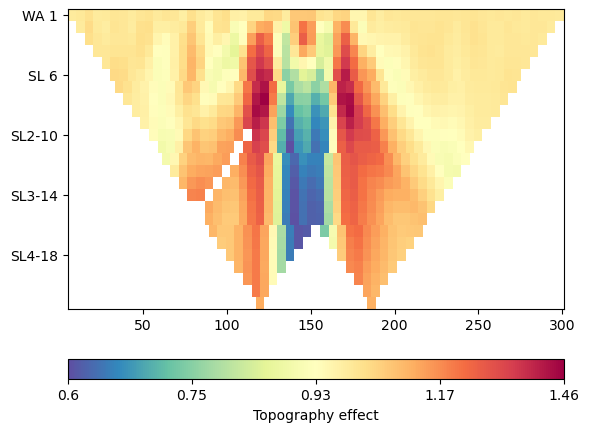

In [5]:
#data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data.additionalPoints(), pg.x(data)))
data['k'] = ert.createGeometricFactors(data, numerical=True)
mgr = ert.ERTManager(sr=False)
k0 = ert.createGeometricFactors(data)
ert.showData(data, vals=k0/data['k'], label='Topography effect')

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1f85d3e2490>)

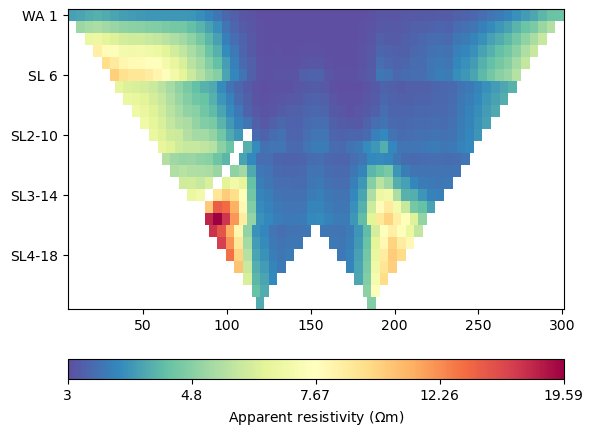

In [6]:

data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
ert.show(data, data['err']*100)

16/05/24 - 16:06:49 - pyGIMLi - INFO - Found 2 regions.
16/05/24 - 16:06:49 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
16/05/24 - 16:06:49 - pyGIMLi - INFO - Found 2 regions.
16/05/24 - 16:06:49 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
16/05/24 - 16:06:49 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/05/24 - 16:06:49 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
16/05/24 - 16:06:49 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2958 Cells: 5484 Boundaries: 4328
16/05/24 - 16:06:49 - pyGIMLi - INFO - Use median(data values)=57.59
16/05/24 - 16:06:49 - pyGIMLi - INFO - Created startmodel from forward operator: 1158, min/max=57.590000/57.590000
16/05/24 - 16:06:49 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001F85D2EC900>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001F85D2ECC70>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001F85D2ECAE0>
min/max (data): 1.1/1619
min/max (error): 3%/19.59%
min/max (start model): 57.59/57.59
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1755.31
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  423.34 (dPhi = 75.59%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   91.27 (dPhi = 77.98%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   41.38 (dPhi = 53.40%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   11.06 (dPhi = 68.72%) lam: 10.0
-----------

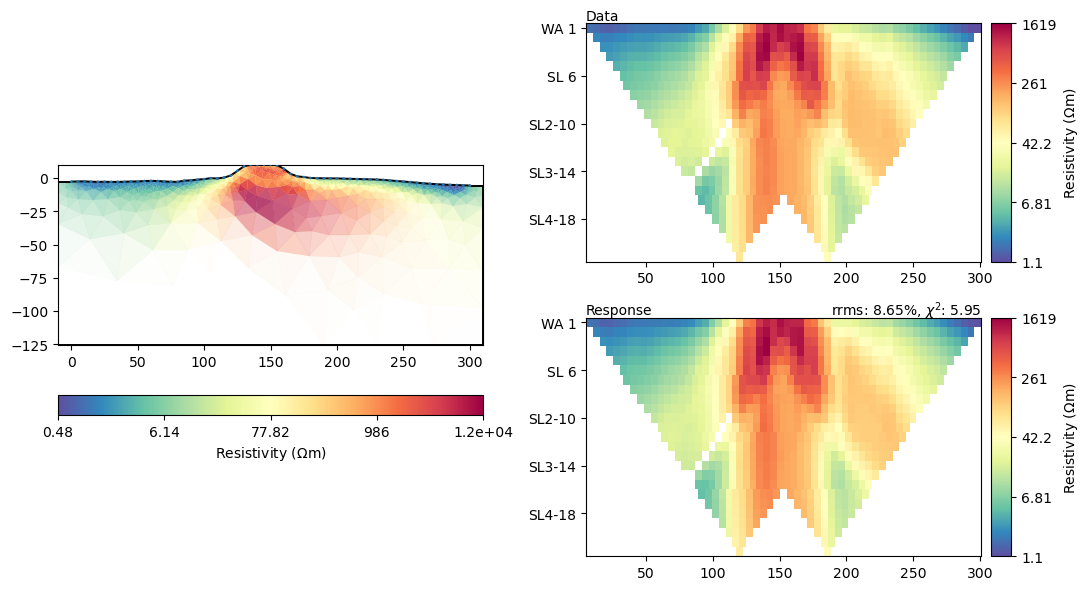

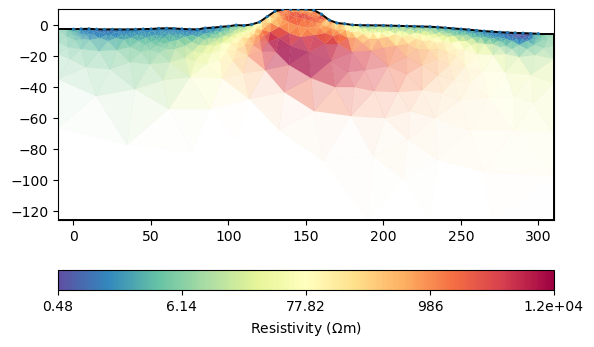

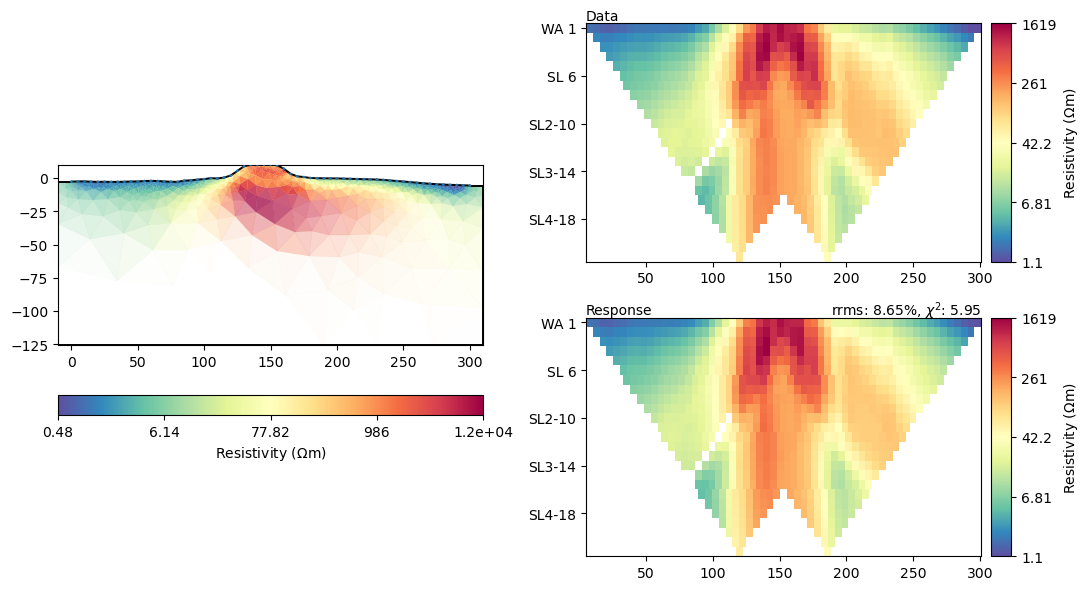

In [7]:

mgr.invert(data, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=10)

mgr.showResult()
mgr.showResultAndFit()

In [ ]:
mgr.showResultAndFit()

In [ ]:

ax, cb = mgr.showResult(mod, cMap="Spectral_r", logScale=True)
ax.set_ylim(-50,10)
ax.yaxis.set_major_locator(plt.MaxNLocator(5))



0 -10.002512966250032 -2.5959
1 -10.002512966250032 -125.5727
2 310.00251296625004 -125.5727
3 310.00251296625004 -5.5727
4 -310.00251296625004 -2.5959
5 -310.00251296625004 -422.5959
6 610.00251296625 -5.5727
7 610.00251296625 -425.5727
8 0.0 -2.5959
9 1.25 -2.567875
10 3.75 -2.511825
11 5.0 -2.4838
12 6.25 -2.462625
13 8.75 -2.4202749999999997
14 10.0 -2.3991
15 11.25 -2.4665
16 13.75 -2.6012999999999997
17 15.0 -2.6687
18 16.25 -2.6971749999999997
19 18.75 -2.754125
20 20.0 -2.7826
21 21.25 -2.765925
22 23.75 -2.7325749999999998
23 25.0 -2.7159
24 26.25 -2.74455
25 28.75 -2.80185
26 30.0 -2.8305
27 31.25 -2.818975
28 33.75 -2.795925
29 35.0 -2.7844
30 36.25 -2.7641
31 38.75 -2.7235
32 40.0 -2.7032
33 41.25 -2.657425
34 43.75 -2.5658749999999997
35 45.0 -2.5201
36 46.25 -2.514
37 48.75 -2.5018
38 50.0 -2.4957
39 51.25 -2.408925
40 53.75 -2.235375
41 55.0 -2.1486
42 56.25 -2.124025
43 58.75 -2.074875
44 60.0 -2.0503
45 61.25 -2.077
46 63.75 -2.1304
47 65.0 -2.1571
48 66.25 -2.23949999

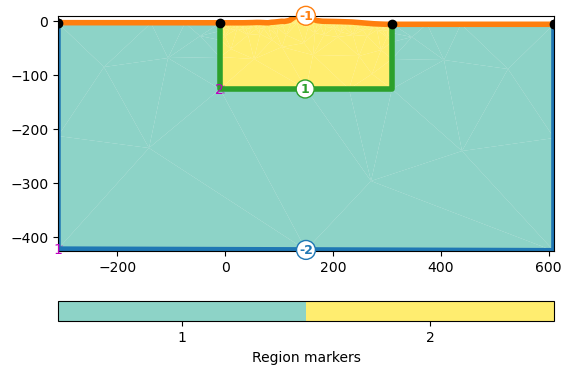

In [8]:
plc = mt.createParaMeshPLC(data, paraDX = 0.25, paraDZ= 0.25, boundary=1)
ax, _ = pg.show(plc, markers=True)

for i, n in enumerate(plc.nodes()):
    #ax.text(n.x(), n.y(), str(i))
    print(i, n.x(), n.y())
for nr, marker in enumerate(plc.regionMarkers()):
    print('Position marker number {}:'.format(nr + 1), marker.x(), marker.y(),
          marker.z())


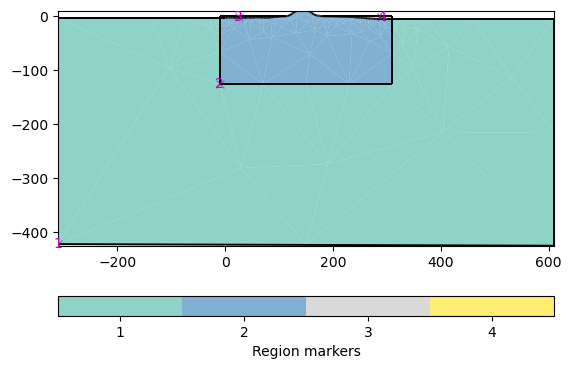

In [9]:


l1 = mt.createLine([-10,0], [-10, -2.5959])
#l2 = mt.createLine([-10,0], [110, 0])
l2 = mt.createLine([-10,0], [113.47962306342757, 0])
l3 = mt.createLine([180,0], [310.00151296625006, 0])
l4 = mt.createLine([310.00151296625006,0], [310.00151296625006, -6])

plc2 = plc + l1 + l2 + l3 + l4
  
plc2.addRegionMarker([25, -1], marker=3)  
plc2.addRegionMarker([290, -1.5], marker=4)  
#pg.show(plc2)
ax, _ = pg.show(plc2)
#ax.set_ylim(-8)
#ax.set_xlim(-50,381)

17/05/24 - 09:58:07 - pyGIMLi - INFO - Found 4 regions.
17/05/24 - 09:58:07 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
17/05/24 - 09:58:07 - pyGIMLi - INFO - Creating forward mesh from region infos.
17/05/24 - 09:58:08 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
17/05/24 - 09:58:08 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 24446 Cells: 47884 Boundaries: 36416
17/05/24 - 09:58:09 - pyGIMLi - INFO - Use median(data values)=57.59
17/05/24 - 09:58:09 - pyGIMLi - INFO - Created startmodel from forward operator: 8546, min/max=57.590000/57.590000
17/05/24 - 09:58:09 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001F85D2EC900>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001F85D2ECC70>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000001F89243FDF0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x000001F89243FF40>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x000001F89243FE60>
min/max (data): 1.1/1619
min/max (error): 3%/19.59%
min/max (start model): 57.59/57.59
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1687.88
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  536.73 (dPhi = 67.96%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   84.59 (dPhi = 83.84%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   25.81 (dPhi = 67.84%) lam: 10.0
-

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1f896f8fc90>)

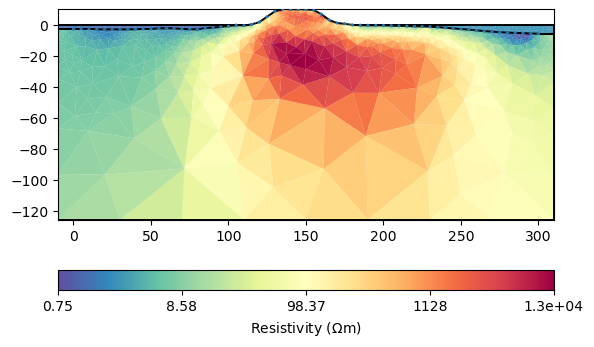

In [19]:
mesh = mt.createMesh(plc2)
mgr.setMesh(mesh)

#mgr.inv.setRegularization(0, background=False)

mgr.inv.setRegularization(3, limits=[0.1, 1.3])
mgr.inv.setRegularization(4, limits=[0.1, 2.5])

#mgr.inv.setRegularization(3, limits=[1, 2])
#mgr.inv.setRegularization(4, limits=[3, 4])

#print("Number of regions: ", mgr.fop.regionManager().region(0))
mod2 = mgr.invert(data, lam=10, verbose=True, paraDX = 0.25, paraDZ= 0.25)

mgr.showResult(mod2, coverage=1)

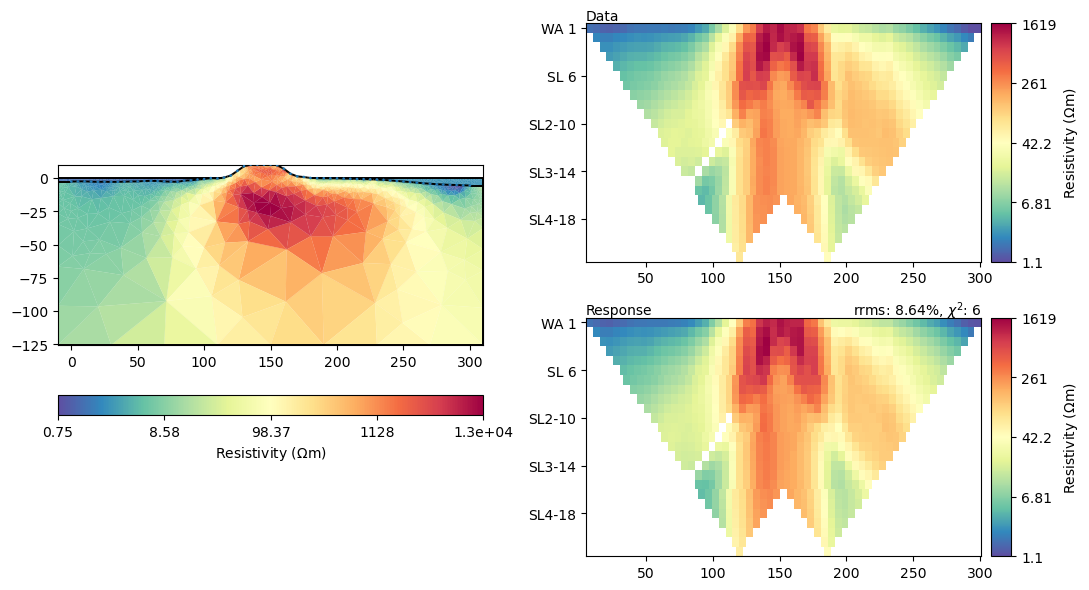

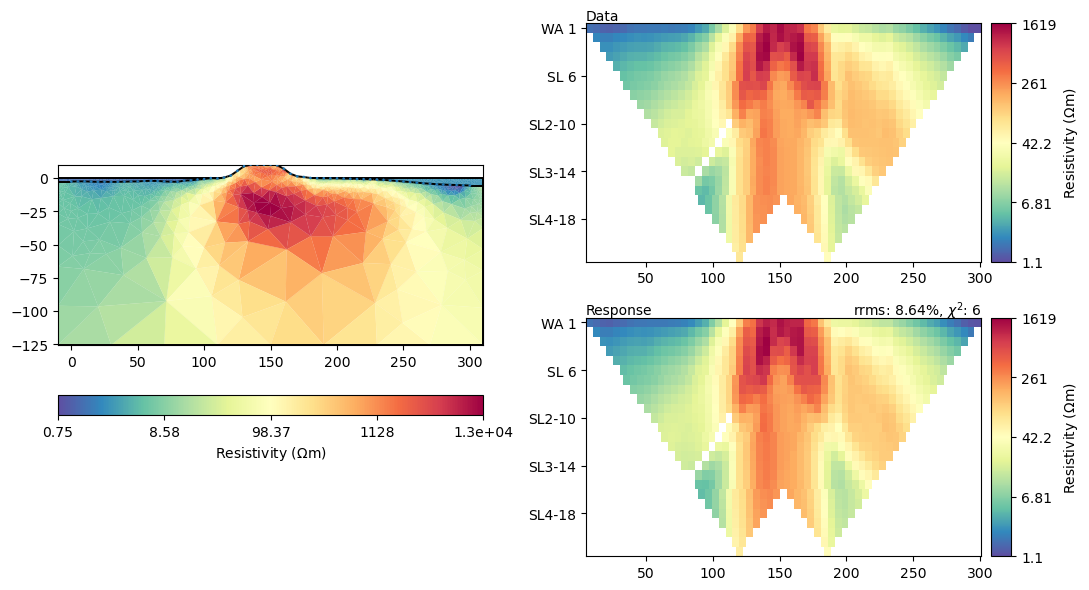

In [20]:
mgr.showResultAndFit(coverage=1)


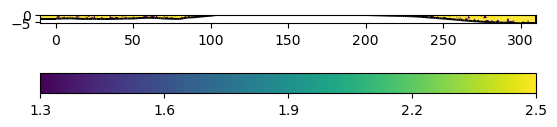

In [16]:
water = mesh.createSubMesh(mesh.cells((mesh.cellMarkers() == 3) | (mesh.cellMarkers() == 4)))
resWater = mgr.fw.model[len(mgr.model)-water.cellCount():]
ax, cb = pg.show(water, resWater)

In [ ]:
ddir = '//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/ERT_sump/mehriban/10_Aug_KamikF38/res2dinv_inputs/'
dd = ert.load(ddir+'DD_ele_nogps.dat')
dd.save(ddir+"dd.txt", "a b m n err rhoa")
print(open(ddir+"dd.txt").read())



In [ ]:
ws = ert.load(ddir+"WS_ele_gps_noerror.dat")
ws.save(ddir+"ws.txt", "a b m n err rhoa")
print(open(ddir+"ws.txt").read())

In [ ]:
wsrec = ert.load(ddir+"WS_rec_ele_nogps_noerror.dat")
wsrec.save(ddir+"wsrec.txt", "a b m n err rhoa")
print(open(ddir+"wsrec.txt").read())